In [1]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon

#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
results_post = 'Milestones - Post Experiment All.csv'
results_pre = 'Milestones - Pre Experiment.csv'
results_milestones = 'Milestones - timeStandard-prod-fill-nan-27032023.csv'

dataBinary_post = pd.read_csv(results_post)
dataPre = pd.read_csv(results_pre)
dataMilestones = pd.read_csv(results_milestones)


In [2]:
dataBinary_post

,Participant,group,issue,Why did you choose that issue?,Summary: Why Did you choose,Post: Skills Needed,Skills Correct,Percentage Skills Correct,Post: Difficulty,DifficultyNumeric,...,Post: Helpful Labels,Post: Confidence Level Had Skills,ConfidenceNumeric,Post: Additional Feedback,Post: Education Level,Occupation,Gender,Country of Origin,Curr Country,Age
0,FelipeFelixSantos@gmail.com,Treatment,5485,"Because of the ""good first issue label""",Useful information,None,None,0.000000,Extremely easy,1,...,good first issue,Confident,4,1 - Not being able to use shortcuts due to the...,Undergraduate degree,Professional Developer,Man,Brazil,Portugal,25 to 34
1,gk325@nau.edu,Treatment,4612,I just thought it would be something related t...,Skills Matched,None,None,0.000000,Somewhat difficult,4,...,search,Average,3,had fun. Thank you.,Master's degree,Student - Graduate,Man,India,United States of America,25 to 34
2,sb3292@nau.edu,Treatment,5194,I found that it was one of the concerns that I...,Easy,"Testing,Google Common,Input and Output","Google Common, IO",0.666667,Somewhat difficult,4,...,"API: Google Common,API: Logging,type: bug,exte...",Average,3,I had a lot of fun trying to debug the code.,Master's degree,Student - Graduate,Woman,India,United States of America,24 or less
3,gummadisk99@gmail.com,Control,4612,"AS I SAID EARLIER, URL SHOULD BE VISIBLE TO TH...",Had idea of the solution,"User Interface (UI),Testing",UI,0.333333,Somewhat difficult,4,...,"API: User Interface,preferences,type: bug","Not confident (can manage, but difficult)",2,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
4,hk486@nau.edu,Treatment,5069,That issue looked the most easy issue.,Easy,"User Interface (UI),Testing,Input and Output",UI,0.200000,Neither easy nor difficult,3,...,"API: User Interface,entry editor,type: bug","Not confident (can manage, but difficult)",2,NaN,High school,Student - Undergraduate,Man,South Korea,United States of America,24 or less
5,kv582@nau.edu,Control,5485,I chose this issue since its quite prevalent t...,Interested in problem,Google Common,Google Common,0.250000,Somewhat easy,2,...,"API: Test,API: Google Common,search",Average,3,NaN,Undergraduate degree,Student - Graduate,Woman,India,United States of America,25 to 34
6,vg588@nau.edu,Treatment,5485,because I have dealt with these kinds of param...,Skills Matched,"Logging,Testing",None,0.000000,Somewhat easy,2,...,"API: Input and Output,fetcher,good first issue",Confident,4,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
7,ma3932@nau.edu,Treatment,5485,After looking at the description it appears to...,Useful information,"User Interface (UI),Input and Output",None,0.000000,Somewhat difficult,4,...,API: Input and Output,Average,3,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,25 to 34
8,"nk545@nau,edu",Control,5069,search pattern and thought simmple,Easy,"User Interface (UI),Logging,Testing,Input and ...","Logging, UI",0.400000,Somewhat difficult,4,...,"search,type: bug",Average,3,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
9,sm4332@nau.edu,Control,4612,It is the only known issue to me that contains...,Skills Matched,"User Interface (UI),Testing,Input and Output","UI, IO",0.666667,Extremely difficult,5,...,"search,entry editor,type: bug","Not confident (can manage, but difficult)",2,NaN,Undergraduate degree,Student - Graduate,Woman,India,United States of America,25 to 34


In [3]:
dataBinary_post.drop(columns=["Why did you choose that issue?", "Post: Explain Difficulty", "Post: Explain Accomplishment", "Post: How could we make it easier?", "Post: Additional Feedback"])

,Participant,group,issue,Summary: Why Did you choose,Post: Skills Needed,Skills Correct,Percentage Skills Correct,Post: Difficulty,DifficultyNumeric,Summary: Explain Difficulty,...,Summary: How could we make it easier?,Post: Helpful Labels,Post: Confidence Level Had Skills,ConfidenceNumeric,Post: Education Level,Occupation,Gender,Country of Origin,Curr Country,Age
0,FelipeFelixSantos@gmail.com,Treatment,5485,Useful information,None,None,0.000000,Extremely easy,1,Simple change,...,Additional documentation and issue info,good first issue,Confident,4,Undergraduate degree,Professional Developer,Man,Brazil,Portugal,25 to 34
1,gk325@nau.edu,Treatment,4612,Skills Matched,None,None,0.000000,Somewhat difficult,4,Lack of familiarity with JabRef,...,Additional documentation and issue info,search,Average,3,Master's degree,Student - Graduate,Man,India,United States of America,25 to 34
2,sb3292@nau.edu,Treatment,5194,Easy,"Testing,Google Common,Input and Output","Google Common, IO",0.666667,Somewhat difficult,4,Lack of familiarity with JabRef,...,Improved comments and code readability,"API: Google Common,API: Logging,type: bug,exte...",Average,3,Master's degree,Student - Graduate,Woman,India,United States of America,24 or less
3,gummadisk99@gmail.com,Control,4612,Had idea of the solution,"User Interface (UI),Testing",UI,0.333333,Somewhat difficult,4,Lack of familiarity with JabRef,...,None,"API: User Interface,preferences,type: bug","Not confident (can manage, but difficult)",2,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
4,hk486@nau.edu,Treatment,5069,Easy,"User Interface (UI),Testing,Input and Output",UI,0.200000,Neither easy nor difficult,3,Unsure of exact solution implementation,...,Additional documentation and issue info,"API: User Interface,entry editor,type: bug","Not confident (can manage, but difficult)",2,High school,Student - Undergraduate,Man,South Korea,United States of America,24 or less
5,kv582@nau.edu,Control,5485,Interested in problem,Google Common,Google Common,0.250000,Somewhat easy,2,Rating out of ten,...,None,"API: Test,API: Google Common,search",Average,3,Undergraduate degree,Student - Graduate,Woman,India,United States of America,25 to 34
6,vg588@nau.edu,Treatment,5485,Skills Matched,"Logging,Testing",None,0.000000,Somewhat easy,2,Issue had relevant information,...,Improve logging in code,"API: Input and Output,fetcher,good first issue",Confident,4,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
7,ma3932@nau.edu,Treatment,5485,Useful information,"User Interface (UI),Input and Output",None,0.000000,Somewhat difficult,4,Lack of familiarity with JabRef,...,Additional documentation and issue info,API: Input and Output,Average,3,Undergraduate degree,Student - Graduate,Man,India,United States of America,25 to 34
8,"nk545@nau,edu",Control,5069,Easy,"User Interface (UI),Logging,Testing,Input and ...","Logging, UI",0.400000,Somewhat difficult,4,Rating out of ten,...,Improved comments and code readability,"search,type: bug",Average,3,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
9,sm4332@nau.edu,Control,4612,Skills Matched,"User Interface (UI),Testing,Input and Output","UI, IO",0.666667,Extremely difficult,5,Lack of familiarity with JabRef,...,None,"search,entry editor,type: bug","Not confident (can manage, but difficult)",2,Undergraduate degree,Student - Graduate,Woman,India,United States of America,25 to 34


In [4]:
#Relevel the factors for Difficulty
#TODO Wilson-Cox test for numeric values and difference between groups. 
#TODO Test for the factors/string based scales. 
#dataBinary_post = dataBinary_post.assign(Difficulty = [1 if a == "Extremely easy" 2 elif a == "Somewhat Easy" else  for a in dataBinary_post['Post: Difficulty']])
#dataBinary_post.head()
#dataBinary_post["Post: Difficulty"] = pd.Categorical(dataBinary_post["Post: Difficulty"])
#1 is low confidence, 5 is high confidence
#dataBinary_post["Post: Difficulty"] = dataBinary_post["Post: Difficulty"].cat.codes
postMeans = dataBinary_post.groupby(['group']).mean()
postMeans

,issue,Percentage Skills Correct,DifficultyNumeric,ConfidenceNumeric
group,,,,
Control,5055.333333,0.275,3.833333,2.666667
Treatment,5259.750000,0.200,3.250000,2.875000


In [5]:
confidenceCounts = dataBinary_post.groupby(['group', 'Post: Confidence Level Had Skills'])['Participant'].count()
confidenceCounts

group      Post: Confidence Level Had Skills        
Control    Average                                      4
           Not confident (can manage, but difficult)    2
Treatment  Average                                      3
           Confident                                    2
           Not confident (can manage, but difficult)    3
Name: Participant, dtype: int64

#Relevel the factors for Difficulty
#TODO Wilson-Cox test for numeric values and difference between groups. 
#TODO Test for the factors/string based scales. 
#dataBinary_post = dataBinary_post.assign(Difficulty = [1 if a == "Extremely easy" 2 elif a == "Somewhat Easy" else  for a in dataBinary_post['Post: Difficulty']])
#dataBinary_post.head()
#dataBinary_post["Post: Difficulty"] = pd.Categorical(dataBinary_post["Post: Difficulty"])
#1 is low confidence, 5 is high confidence
#dataBinary_post["Post: Difficulty"] = dataBinary_post["Post: Difficulty"].cat.codes
postMeans = dataBinary_post.groupby(['group', ']).mean()
postMeans

In [6]:
control = dataBinary_post[dataBinary_post["group"]=='Control']
treatment = dataBinary_post[dataBinary_post["group"]=='Treatment']
len(control)
len(treatment)
#wilcoxon(control, treatment)


8

<AxesSubplot:xlabel='group'>

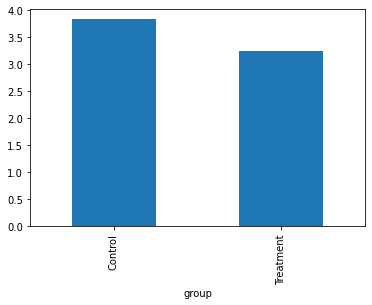

In [7]:
postMeans["DifficultyNumeric"].plot(kind='bar')

In [8]:
dataPre.head()

,Participant,group,issue_number,Pre:Why did they select,Pre: Summary: Why did you select,Pre: Confidence Level,Pre: Explain Confidence Level,Pre: Summary: Explain Confidence Level,Pre: Skills Needed,Pre: Skills Correct,Pre: Percentage Skills Correct,Pre: Helpful Labels,Post: Skills Needed
0,gummadisk99@gmail.com,Control,4612,url should be visible to the end users and sho...,Had idea of the solution.,"Not confident (can manage, but difficult)",2,Rating out of ten,"User Interface (UI),Testing",UI,0.50,"preferences,entry editor,type: bug","User Interface (UI),Testing"
1,hk486@nau.edu,Treatment,5069,This issue looked the easy to contribute.,Easy,"Not confident (can manage, but difficult)",I am not sure if I can change the issue. But I...,Idea of the solution and location of problem.,"User Interface (UI),Testing,Network Developmen...","UI, Network",0.40,API: User Interface,"User Interface (UI),Testing,Input and Output"
2,ap3535@nau.edu,Control,5485,The issue was descriptive compared to other is...,Issue more descriptive than others.,Confident,I have prior experience of working with API.,Prior Experience/Skills Match.,"Google Common,Input and Output",Util,0.25,None of the above,Google Common
3,kv582@nau.edu,Control,5485,I chose this issue since its an issue widely f...,Interested in problem.,Average,I have initially started my research on deprec...,Prior Experience/Skills Match.,"Testing,Google Common",Util,0.25,"API: Test,API: Google Common,search",Google Common
4,vg588@nau.edu,Treatment,5485,This feel like newer version of the package ha...,Had idea of the solution,Average,I have handled the package dependencies upgrad...,Prior Experience/Skills Match.,"Logging,Testing,Input and Output",None,0.00,"API: Input and Output,fetcher,good first issue","Logging,Testing"


In [9]:
preMeans = dataPre.groupby(['group']).mean()
preMeans

,issue_number,Pre: Percentage Skills Correct
group,,
Control,5116.714286,0.219048
Treatment,5357.400000,0.226667


In [10]:
dataPre.head()

,Participant,group,issue_number,Pre:Why did they select,Pre: Summary: Why did you select,Pre: Confidence Level,Pre: Explain Confidence Level,Pre: Summary: Explain Confidence Level,Pre: Skills Needed,Pre: Skills Correct,Pre: Percentage Skills Correct,Pre: Helpful Labels,Post: Skills Needed
0,gummadisk99@gmail.com,Control,4612,url should be visible to the end users and sho...,Had idea of the solution.,"Not confident (can manage, but difficult)",2,Rating out of ten,"User Interface (UI),Testing",UI,0.50,"preferences,entry editor,type: bug","User Interface (UI),Testing"
1,hk486@nau.edu,Treatment,5069,This issue looked the easy to contribute.,Easy,"Not confident (can manage, but difficult)",I am not sure if I can change the issue. But I...,Idea of the solution and location of problem.,"User Interface (UI),Testing,Network Developmen...","UI, Network",0.40,API: User Interface,"User Interface (UI),Testing,Input and Output"
2,ap3535@nau.edu,Control,5485,The issue was descriptive compared to other is...,Issue more descriptive than others.,Confident,I have prior experience of working with API.,Prior Experience/Skills Match.,"Google Common,Input and Output",Util,0.25,None of the above,Google Common
3,kv582@nau.edu,Control,5485,I chose this issue since its an issue widely f...,Interested in problem.,Average,I have initially started my research on deprec...,Prior Experience/Skills Match.,"Testing,Google Common",Util,0.25,"API: Test,API: Google Common,search",Google Common
4,vg588@nau.edu,Treatment,5485,This feel like newer version of the package ha...,Had idea of the solution,Average,I have handled the package dependencies upgrad...,Prior Experience/Skills Match.,"Logging,Testing,Input and Output",None,0.00,"API: Input and Output,fetcher,good first issue","Logging,Testing"


In [11]:
dataBinary_post.head()

,Participant,group,issue,Why did you choose that issue?,Summary: Why Did you choose,Post: Skills Needed,Skills Correct,Percentage Skills Correct,Post: Difficulty,DifficultyNumeric,...,Post: Helpful Labels,Post: Confidence Level Had Skills,ConfidenceNumeric,Post: Additional Feedback,Post: Education Level,Occupation,Gender,Country of Origin,Curr Country,Age
0,FelipeFelixSantos@gmail.com,Treatment,5485,"Because of the ""good first issue label""",Useful information,None,None,0.000000,Extremely easy,1,...,good first issue,Confident,4,1 - Not being able to use shortcuts due to the...,Undergraduate degree,Professional Developer,Man,Brazil,Portugal,25 to 34
1,gk325@nau.edu,Treatment,4612,I just thought it would be something related t...,Skills Matched,None,None,0.000000,Somewhat difficult,4,...,search,Average,3,had fun. Thank you.,Master's degree,Student - Graduate,Man,India,United States of America,25 to 34
2,sb3292@nau.edu,Treatment,5194,I found that it was one of the concerns that I...,Easy,"Testing,Google Common,Input and Output","Google Common, IO",0.666667,Somewhat difficult,4,...,"API: Google Common,API: Logging,type: bug,exte...",Average,3,I had a lot of fun trying to debug the code.,Master's degree,Student - Graduate,Woman,India,United States of America,24 or less
3,gummadisk99@gmail.com,Control,4612,"AS I SAID EARLIER, URL SHOULD BE VISIBLE TO TH...",Had idea of the solution,"User Interface (UI),Testing",UI,0.333333,Somewhat difficult,4,...,"API: User Interface,preferences,type: bug","Not confident (can manage, but difficult)",2,NaN,Undergraduate degree,Student - Graduate,Man,India,United States of America,24 or less
4,hk486@nau.edu,Treatment,5069,That issue looked the most easy issue.,Easy,"User Interface (UI),Testing,Input and Output",UI,0.200000,Neither easy nor difficult,3,...,"API: User Interface,entry editor,type: bug","Not confident (can manage, but difficult)",2,NaN,High school,Student - Undergraduate,Man,South Korea,United States of America,24 or less


In [12]:
summaryPreChoosing = dataPre.groupby(['Pre: Summary: Why did you select'])['Participant'].count()
summaryPreChoosing


Pre: Summary: Why did you select
Easy                                                      1
Easy. Had idea of the solution.                           1
Had idea of the solution                                  1
Had idea of the solution.                                 1
Idea of solution                                          1
Interested in problem.                                    2
Interested in problem.                                    1
Issue more descriptive than others.                       1
None.                                                     1
Skills matched. Issue descriptive.                        1
Skills matched. Prior experience with similar problem.    1
Name: Participant, dtype: int64

In [13]:
summaryConfidenceLevel = dataPre.groupby(['Pre: Summary: Explain Confidence Level', 'group'])['Participant'].count()
summaryConfidenceLevel


Pre: Summary: Explain Confidence Level          group    
Idea of the solution and location of problem.   Control      1
                                                Treatment    3
Prior Experience/Skills Match.                  Control      2
                                                Treatment    2
Rating out of ten                               Control      4
Name: Participant, dtype: int64

In [14]:
summaryWhyChoose = dataBinary_post.groupby(['Summary: Why Did you choose', 'group'])['Participant'].count()
summaryWhyChoose

Summary: Why Did you choose  group    
Easy                         Control      1
                             Treatment    2
Had idea of the solution     Control      1
Interested in problem        Control      3
                             Treatment    1
Skills Matched               Control      1
                             Treatment    3
Useful information           Treatment    2
Name: Participant, dtype: int64

In [15]:
feedbackSummaryDifficulty = dataBinary_post.groupby(['Summary: Explain Difficulty', 'group'])['Participant'].count()
feedbackSummaryDifficulty

Summary: Explain Difficulty              group    
Issue had relevant information           Treatment    1
Lack of familiarity with JabRef          Control      3
                                         Treatment    4
Rating out of ten                        Control      3
Simple change                            Treatment    1
Unsure of exact solution implementation  Treatment    2
Name: Participant, dtype: int64

In [16]:
summaryAccomplishment = dataBinary_post.groupby(["Summary: Explain Accomplishment", "group"])['Participant'].count()
summaryAccomplishment

Summary: Explain Accomplishment                          group    
Couldn't find location                                   Control      1
Couldn't find location                                   Treatment    1
Couldn't implement code                                  Control      4
                                                         Treatment    2
Couldn't understand the problem and high level solution  Treatment    1
Found code location                                      Treatment    1
Unable to verify solution                                Control      1
                                                         Treatment    3
Name: Participant, dtype: int64

In [17]:
summaryMakeEasier = dataBinary_post.groupby(["Summary: How could we make it easier?", "group"])['Participant'].count()
summaryMakeEasier

Summary: How could we make it easier?    group    
Additional documentation and issue info  Control      1
                                         Treatment    4
Improve experiement system/environment   Control      1
Improve logging in code                  Treatment    1
Improved comments and code readability   Control      1
                                         Treatment    3
None                                     Control      3
Name: Participant, dtype: int64

In [18]:
dataMilestones.head()

,Participant,start,issue,problem,folder,file,class,method,line,solution,...,alternative answer,Number of Milestones,Gift card requested,Gift card received,group,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib
0,ItaloSantos,2:35 PM,17,17,18,18,19,21,21,24,...,NaN,3,y,y,Control,5679,4.0,0.0,NaN,NaN
1,FelipeFelixSantos@gmail.com,10:15 AM,2,3,44,45,45,46,47,48,...,NaN,7,y,y,Treatment,5485,NaN,NaN,7.0,0.0
2,gk325@nau.edu,3:09:00 PM,1,6,56,56,58,60,60,60,...,NaN,0,y,y,Treatment,4612,3.0,0.0,NaN,NaN
3,sb3292@nau.edu,4:21:00 PM,3,19,23,23,23,27,27,46,...,y,1,y,y,Treatment,5194,NaN,NaN,9.0,9.0
4,gummadisk99@gmail.com,1:20 PM,4,14,38,38,38,41,41,50,...,NaN,0,y,y,Control,4612,1.0,1.0,NaN,NaN


In [19]:
from scipy.stats import mannwhitneyu
milestonesinfo = dataMilestones[['Number of Milestones', 'group']]
M_control = milestonesinfo[dataMilestones["group"] == 'Control']
print(M_control)
control_milestones = M_control['Number of Milestones'].astype('int32')
#print(control_milestones.dtype)

M_treatment = milestonesinfo[dataMilestones["group"] == 'Treatment']
treatment_milestones = M_treatment['Number of Milestones'].astype('int32')
print(treatment_milestones)

stat, p = mannwhitneyu(control_milestones, treatment_milestones)
print('Statistics=', stat, 'p=', p)
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

    Number of Milestones    group
0                      3  Control
4                      0  Control
6                      0  Control
9                      1  Control
10                     0  Control
13                     0  Control
14                     1  Control
1     7
2     0
3     1
5     1
7     1
8     7
11    1
12    1
Name: Number of Milestones, dtype: int32
Statistics= 15.0 p= 0.11931862115270837
Same distribution (fail to reject H0)


In [20]:
numMilestonesAvg = dataMilestones.groupby(['group'])["Number of Milestones"].mean()
numMilestonesAvg

group
Control      0.714286
Treatment    2.375000
Name: Number of Milestones, dtype: float64

In [21]:

numMilestonesMedian = dataMilestones.groupby(['group'])["Number of Milestones"].median()
numMilestonesMedian
#numMilestonesAvg.plot(kind='bar')

group
Control      0.0
Treatment    1.0
Name: Number of Milestones, dtype: float64

In [23]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print(shapiro(treatment_milestones))
print(shapiro(control_milestones))

ShapiroResult(statistic=0.6499639749526978, pvalue=0.0006045587360858917)
ShapiroResult(statistic=0.7204785346984863, pvalue=0.00617614621296525)


In [24]:
#distribution is not normal!!! 


In [25]:
#https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/
